# Viga del ejemplo 1

|Quién | Correo | Fecha | Qué hizo |
| ---  | ---    | ---   | ---      |
|Diego Andrés Alvarez Marín | <daalvarez@unal.edu.co> | Febrero 12, 2024  | Conversión de código de Maxima a Python |

$$
\newcommand{\dd}{\operatorname{d} \!}
$$

Utilizando la **teoría de vigas de Timoshenko-Ehrenfest**, calcule los diagramas de fuerza cortante, momento flector, ángulo de giro y deflexión vertical de la viga mostrada en la figura:

<img src="viga_1.png" width="600">

In [1]:
from sympy import symbols, init_printing, latex, DiracDelta, Piecewise, integrate, symbols, Eq, plot, piecewise_fold, solve, diff, expand
q0, x, L, E, I, alpha, G, A = symbols('q0 x L E I alpha G A')

# Para imprimir bonito
init_printing()
from IPython.display import Math                 
def imprimir (texto1, variable, texto2=""):
    return Math(texto1 +  rf'{latex(variable)}' + texto2)

Se define una función que hace el código más corto y legible, evitando el uso de las [funciones G de Meijerg](https://en.wikipedia.org/wiki/Meijer_G-function):

In [2]:
integre = lambda f, x : integrate(f, x, meijerg=False)

Se especifica la carga distribuida $q(x)$:

In [3]:
q = -q0*x/L

Recordemos que las cuatro ecuaciones diferenciales de la teoría de Timoshenko-Ehrenfest son:
\begin{align*}
   \frac{\dd V(x)}{\dd x}     &= q(x) \\
   \frac{\dd M(x)}{\dd x}     &= V(x) \\
   \frac{\dd\theta(x)}{\dd x} &= \frac{M(x)}{E(x)I(x)}\\
   \frac{\dd v(x)}{\dd x}     &= \theta(x) - \frac{V(x)}{\alpha G(x) A(x)}.
\end{align*}

Si dichas ecuaciones diferenciales se integran, se obtienen las siguientes ecuaciones,
\begin{align*}
      V(x)      &= \int q(x) \dd x + C_1 \\
      M(x)      &= \int V(x) \dd x + C_2 \\
      \theta(x) &= \int \frac{M(x)}{E(x) I(x)} \dd x + C_3 \\
      v(x)      &= \int \left(\theta(x) - \frac{V(x)}{\alpha G(x) A(x)}\right) \dd x + C_4,
\end{align*}

In [4]:
C1, C2, C3, C4 = symbols('C1 C2 C3 C4')
V = integre(q, x)                 + C1
M = integre(V, x)                 + C2
t = integre(M/(E*I), x)           + C3
v = integre(t - V/(alpha*G*A), x) + C4

Ahora es necesario plantear las condiciones de frontera, con el objeto de encontrar el valor de las constantes de integración $C_1$, $C_2$, $C_3$ y $C_4$. Existen dos tipos de empotramiento: el empotramiento suave $\theta(0) = 0$ y el rígido $\frac{\dd v(0)}{\dd x} = $;

## Caso E: análisis con un empotramiento que previene la rotación de la sección transversal de la viga
\begin{align*}
\theta(0) &= 0  &  V(L) &= 0 \\
v(0) &= 0       &  M(L) &= 0.
\end{align*}

In [5]:
## Caso E: análisis con un empotramiento que previene la rotación de la sección transversal de la viga
## Nota: este es el caso que resuelven los programas de elementos finitos

sol = solve([ Eq(t.subs(x,0), 0),   # giro de la sección transveral en el apoyo (en x=0) es 0
              Eq(v.subs(x,0), 0),   # desplazamiento vertical en el apoyo (en x=0) es 0
              Eq(V.subs(x,L), 0),   # fuerza cortante en x=6 es 0
              Eq(M.subs(x,L), 0) ], # momento flector en x=6 es 0
              [ C1, C2, C3, C4 ])

## Caso C: análisis con un empotramiento que previene la rotación del eje neutro de la viga
\begin{align*}
\frac{\dd v(0)}{\dd x} &= 0  &  V(L) &= 0 \\
v(0) &= 0       &  M(L) &= 0.
\end{align*}

Las constantes desconocida quedaron dentro del diccionario ```sol```:

In [6]:
imprimir(r"\texttt{sol} = ", sol)

<IPython.core.display.Math object>

Se reemplaza aquí el valor de las constantes de integración

In [7]:
V = expand(V.subs(sol))
M = expand(M.subs(sol))
t = expand(t.subs(sol))
v = expand(v.subs(sol))

### Se imprimen los resultados

In [8]:
imprimir("V(x) = ", V)

<IPython.core.display.Math object>

In [9]:
imprimir("M(x) = ", M)

<IPython.core.display.Math object>

In [10]:
imprimir(r"\frac{\dd v(x)}{\dd x} = ", diff(v,x))

<IPython.core.display.Math object>

In [11]:
imprimir("v(x) = ", v)

<IPython.core.display.Math object>

### Se calculan las reacciones en la viga 

In [12]:
imprimir("F_y(x=0) =" , +V.subs(x, 0))

<IPython.core.display.Math object>

In [13]:
imprimir("M(x=0) =", -M.subs(x, 0))

<IPython.core.display.Math object>

Se grafican los resultados para los valores de las variables:

In [14]:
b     = 0.10 # [m]
h     = 0.15 # [m]
nu    = 0.3  # coeficiente de Poisson
E     = 21e6 # [kPa]

valores = [ ('alpha', 5/6         ),  # factor de corrección del esfuerzo cortante para una sección rectangular
            (L,       3.0         ),  # [m]            
            ('E',     E           ),  # [kPa]
            (G,       E/(2*(1+nu))),  # [kPa]           
            (q0,      100         ),  # [kN/m]
            (A,       b*h         ),  # [m²]           
            (I,       b*h*h*h/12  ) ] # [m⁴]
  
V = V.subs(valores)
M = M.subs(valores)
t = t.subs(valores)
v = v.subs(valores)

In [15]:
x_xmin_xmax = (x, 0+0.001, 3-0.001)

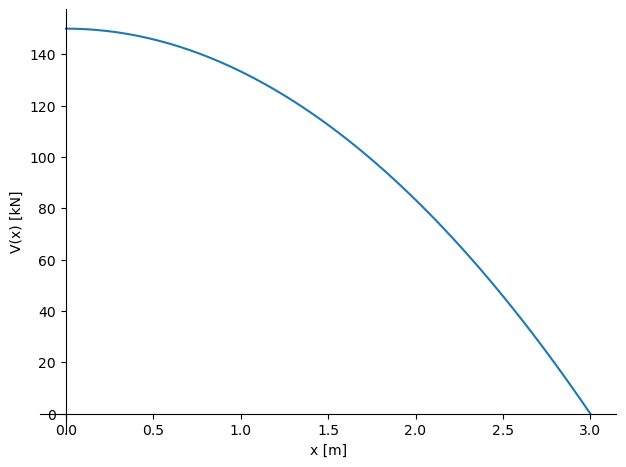

In [16]:
plot(V, x_xmin_xmax, xlabel='x [m]', ylabel='V(x) [kN]')

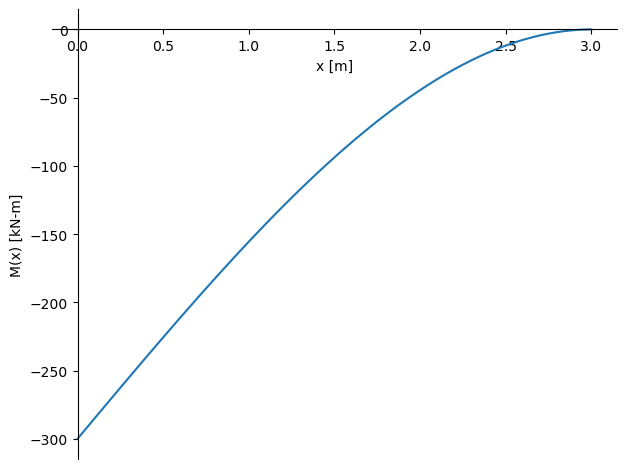

In [17]:
plot(M, x_xmin_xmax, xlabel='x [m]', ylabel='M(x) [kN-m]')

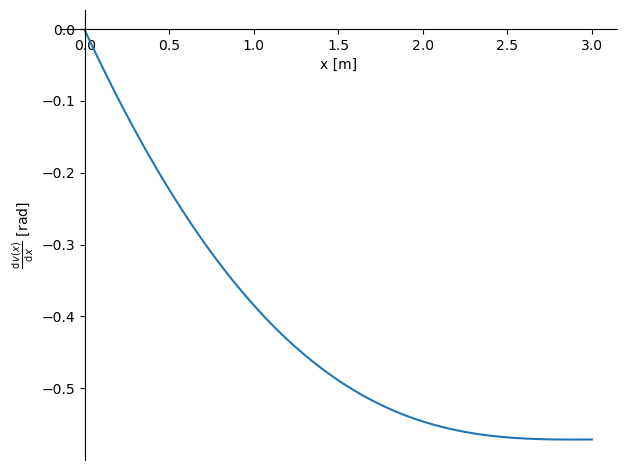

In [18]:
plot(diff(v,x), x_xmin_xmax, xlabel='x [m]', ylabel=r'$\frac{\operatorname{d} v(x)}{\operatorname{d} x}$ [rad]')

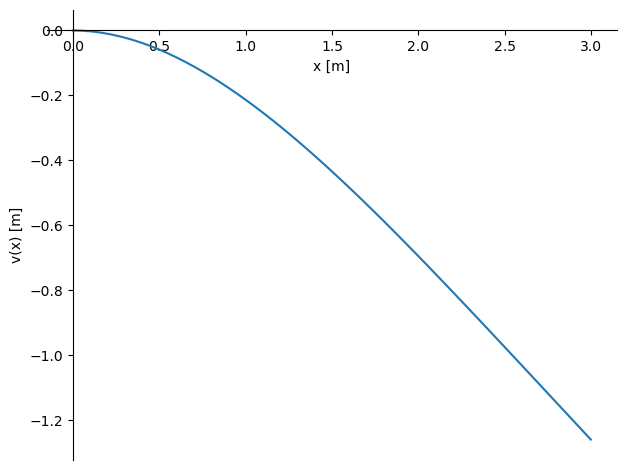

In [19]:
plot(v, x_xmin_xmax, xlabel='x [m]', ylabel='v(x) [m]')